=====================================================================
## <font size = 6 color='brown'><u>Boombikes-Bike Sharing Case Study<u> 
=====================================================================

### **<u>Problem Statement<u>**###
<br>A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### **<u>Business Goal<u>** ###
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### <u>Data Dictionary<u>

=========================================
### <u>Dataset characteristics<u>
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

## 1: <U>Reading and Understanding the Data<U>

- Let us first import the necessary libraries like NumPy, Pandas, seaborn, matplotlib and read the dataset
- And then check the properties of the dataset.

### Importing Necessary Libraries

In [336]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [338]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import r2_score

### Reading the data

In [339]:
df = pd.read_csv("Rental_bikes_data.csv")

In [340]:
# Check the head of the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 2: <u>Cleaning the Data<U>

We need to do some basic cleansing activity in order to feed our model the correct data.

### Examining data properties

In [341]:
# shape of the data
df.shape

(730, 16)

In [342]:
# description of the data
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [343]:
# information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Checking upon Null Values

In [344]:
# Calculating the Missing Values % contribution in dataframe

df_null_columns = (df.isnull().sum().round(2) * 100).sort_values(ascending=False)
print(df_null_columns)

cnt           0
registered    0
casual        0
windspeed     0
hum           0
atemp         0
temp          0
weathersit    0
workingday    0
weekday       0
holiday       0
mnth          0
yr            0
season        0
dteday        0
instant       0
dtype: int64


In [345]:
# Calculating the Missing Values % contribution in the rows of dataframe

df_null_rows = (df.isnull().sum(axis=1).round(2) * 100).sort_values(ascending=False)
print(df_null_rows)

729    0
250    0
248    0
247    0
246    0
      ..
484    0
483    0
482    0
481    0
0      0
Length: 730, dtype: int64


- There are no missing / Null values either in columns or rows.

In [346]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [347]:
# checking number of columns
len(df.columns)

16

In [348]:
# Datatypes
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

- Let us check if any outliers are present in out target variable `cnt`

### Check for the presence of Outliers

(730, 16)

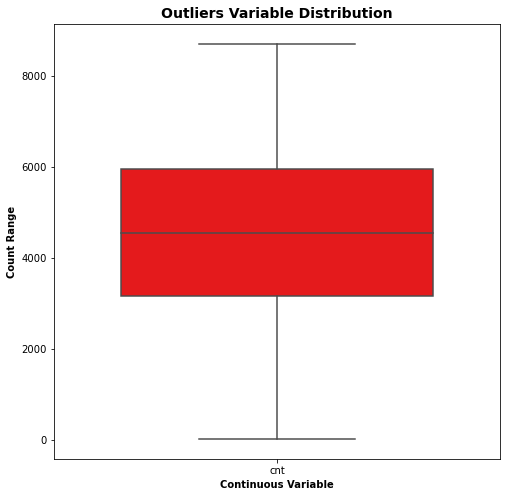

In [349]:
# Outlier Analysis of target variable

outliers = ['cnt']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Count Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
df.shape

#### Insights: 
- As seen from the box plot, there are no outliers present in the target variable.

Checking for correlations between variables to avoid Multicollinearity 
- Multicollinearity refers to a situation in which more than two explanatory variables in a multiple regression model are highly linearly related.

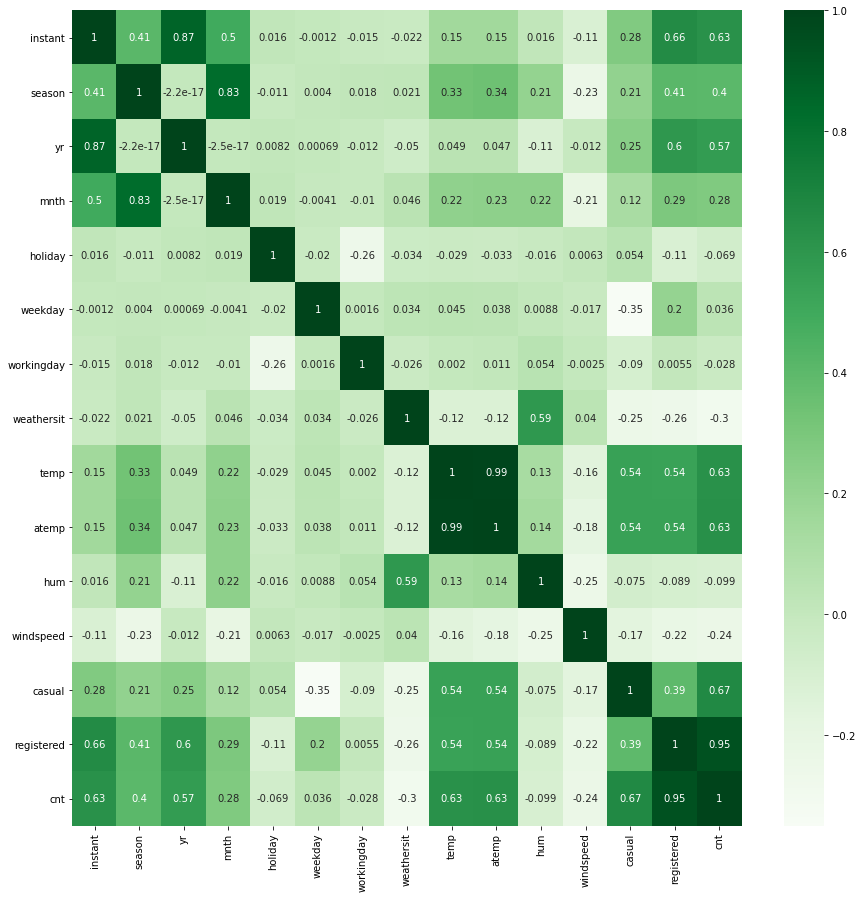

In [350]:
# Plotting a heatmap between the variables of dataset
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap = 'Greens',annot=True)
plt.show()

### Insights:
- As seen from heatmap, `temp` and `atemp` are highly correlated


### Dropping columns and correcting data types

In [351]:
# converting `date` column to datetime format
df['date'] = pd.to_datetime(df['dteday'])

In [352]:
# Drop dteday since it is no longer required
df.drop('dteday',axis = 1, inplace = True)

In [353]:
# Since the index column has no use in the modelling we will drop it based on business knowledge
df.drop('instant',axis = 1,inplace = True)

In [354]:
# Remove the variable `atemp` since it is same as `temp` with a fraction multiplied. This will prevent multicollinearity
df.drop('temp',axis = 1, inplace = True)

In [355]:
# we know that casual+registered=cnt and cnt is our target variable so we will not consider casual and registered
df.drop(['casual','registered'],axis = 1, inplace = True)

## Step 3: <U>Visualising the Data<U>

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- we will also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [356]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt', 'date'],
      dtype='object')

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   season      730 non-null    int64         
 1   yr          730 non-null    int64         
 2   mnth        730 non-null    int64         
 3   holiday     730 non-null    int64         
 4   weekday     730 non-null    int64         
 5   workingday  730 non-null    int64         
 6   weathersit  730 non-null    int64         
 7   atemp       730 non-null    float64       
 8   hum         730 non-null    float64       
 9   windspeed   730 non-null    float64       
 10  cnt         730 non-null    int64         
 11  date        730 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 68.6 KB


In [358]:
# Defining the numeric columns

numeric_columns = ['atemp', 'hum', 'windspeed', 'cnt']

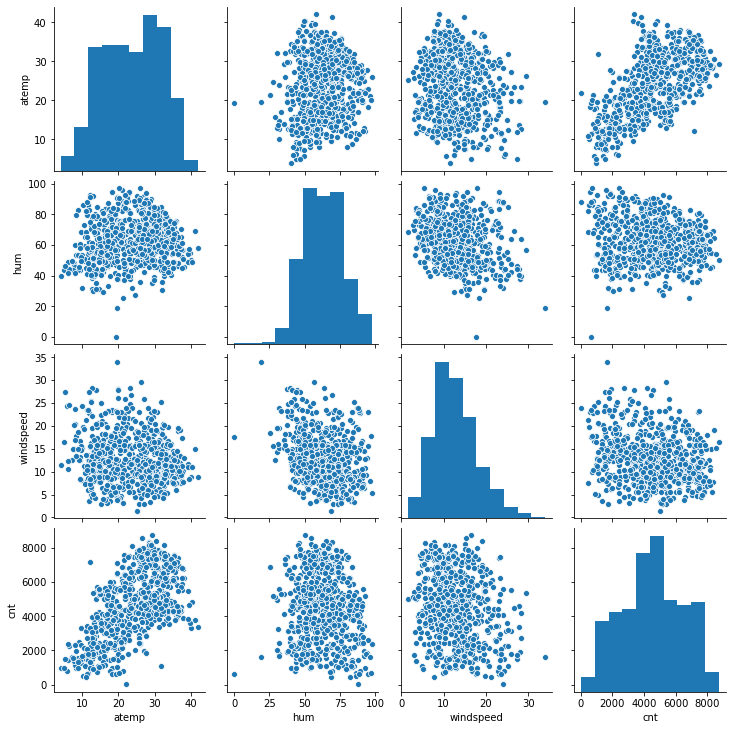

In [359]:
# Plotting the numeric columns
sns.pairplot(df[numeric_columns])
plt.show()

### Insights:
- The variable `atemp` seems to be highly correlated with our target variable `cnt`. Thus it is an important variable to consider.

### Visualising Categorical Data</font>
Defining the categorical columns and correcting their datatypes

In [360]:
# Defining the categorical columns and correcting their datatypes

categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

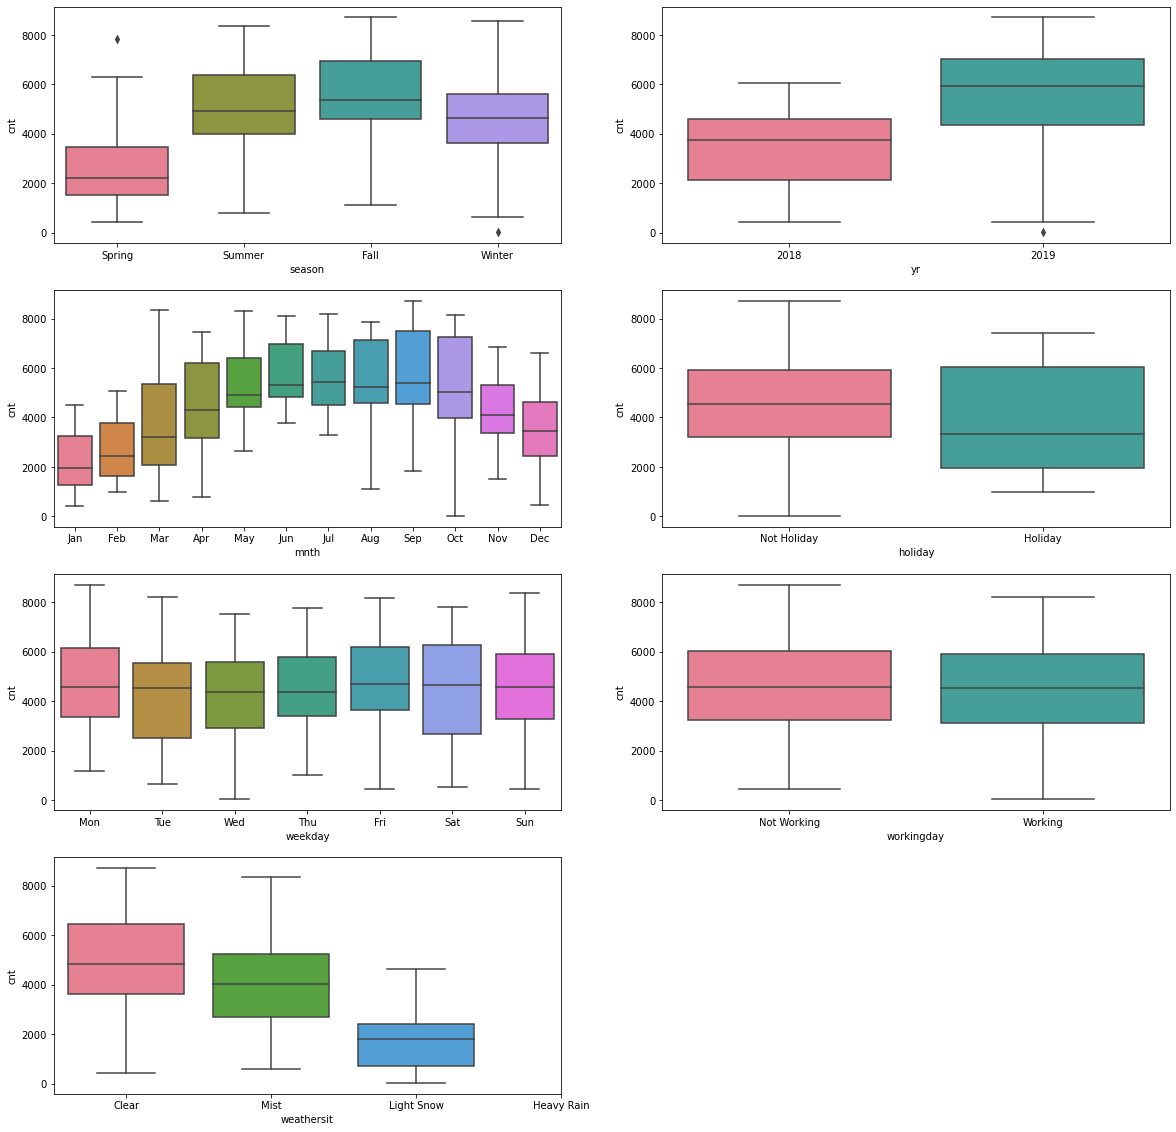

In [361]:
# Boxplot of all the categorical variables

plt.figure(figsize=(20, 20))

#season (1:spring, 2:summer, 3:fall, 4:winter)
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df,  palette='husl')
bars = ('Spring', 'Summer', 'Fall', 'Winter')
x_pos = np.arange(len(bars))
plt.xticks(x_pos,bars)


#year (0: 2018, 1:2019)
plt.subplot(4,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df, palette='husl')
bars = ('2018', '2019')
x_pos = np.arange(len(bars))
plt.xticks(x_pos,bars)


#month ( 1 to 12)
plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df, palette='husl')
bars = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
x_pos = np.arange(len(bars))
plt.xticks(x_pos,bars)


#weather day is a holiday or not(holiday:1, not-holiday:0)
plt.subplot(4,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df, palette='husl')
bars = ('Not Holiday', 'Holiday')
x_pos = np.arange(len(bars))
plt.xticks(x_pos,bars)


#day of the week(0:Mon, 1:Tue, 2:Wed, 3:Thu, 4:Fri, 5:Sat, 6:Sun)
plt.subplot(4,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df, palette='husl')
bars = ('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun')
x_pos = np.arange(len(bars))
plt.xticks(x_pos,bars)


#if day is neither weekend nor holiday is 1, otherwise is 0.
plt.subplot(4,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df, palette='husl')
bars = ('Not Working', 'Working')
x_pos = np.arange(len(bars))
plt.xticks(x_pos,bars)


plt.subplot(4,2,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df, palette='husl')
bars = ('Clear', 'Mist', 'Light Snow', 'Heavy Rain')
x_pos = np.arange(len(bars))
plt.xticks(x_pos,bars)


plt.show()

#### Insights:
- Count of rental bikes count picks up during the seasons `fall` and`summer`. And falls down in `spring`.
- As seen from past 2 years data, more bikes were rented during `2019` as compared to `2018`.
- More bikes are rented when weather is `clear`, lesser during `mist` and lowest during `snowfall`. No bikes are rented during `Heavy Rain`.
- Rentals are uniform throuout the week but there is a small uptrend as weekend appraches.

In [362]:
#Confirming if there is no data for Heavy Rain

df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

#### Insight: 
- Thus data for Heavy Rain is not available. We can infer that no bikes are rented during heavy rains.

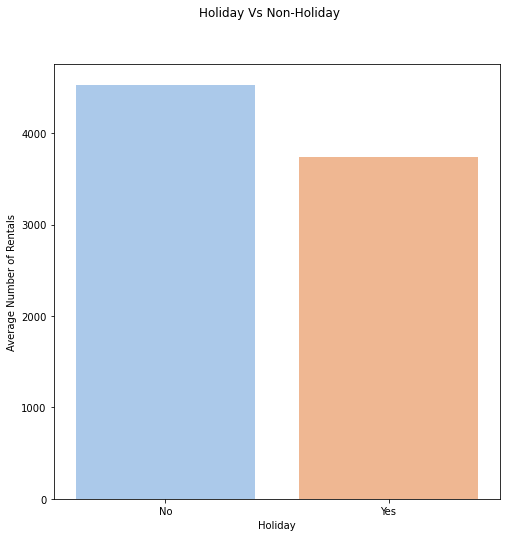

In [363]:
# Checking business on Holidays
holiday_df = df.groupby(['holiday'])['cnt'].mean().reset_index()
sns.barplot(x='holiday', y='cnt', data=holiday_df, palette='pastel')
plt.xticks(np.arange(2),('No','Yes'))
plt.xlabel('Holiday')
plt.ylabel('Average Number of Rentals')
plt.suptitle('Holiday Vs Non-Holiday')
plt.show()

#### Insights: Holidays seems to not much favour bike rentals and are in fact rented more on non-holiday days. 

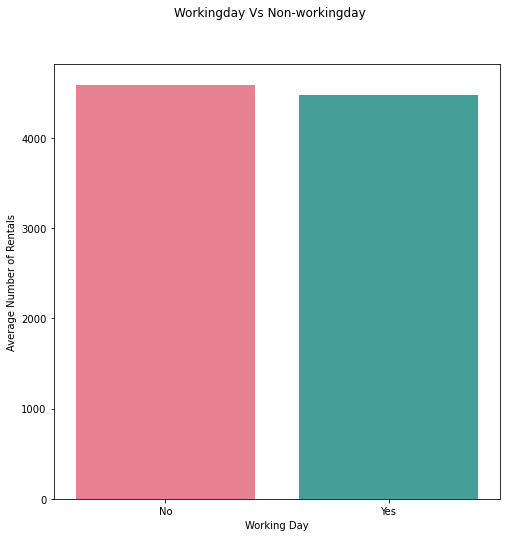

In [364]:
# Checking business on Workingdays
workingday_df = df.groupby(['workingday'])['cnt'].mean().reset_index()
sns.barplot(x='workingday', y='cnt', data=workingday_df, palette='husl')
plt.xticks(np.arange(2),('No','Yes'))
plt.xlabel('Working Day')
plt.ylabel('Average Number of Rentals')
plt.suptitle('Workingday Vs Non-workingday')
plt.show()

#### Insights:
Non-workingday shows a bit rise than workingday.

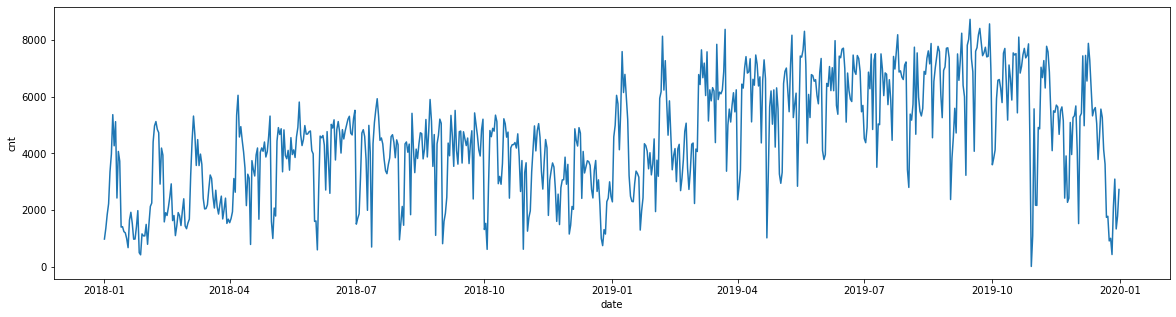

In [365]:
# plotting date Vs cnt to check if the variable adds any significance to the target variable 

plt.figure(figsize = (20, 5))
sns.lineplot(data = df, x='date', y='cnt')
plt.show()

#### Insights: 
- As seen from the plot, no such specific inference can be concluded 

In [366]:
# Removing the date column since it is not a time series forecasting and adds no value to the linear regression model

df.drop('date', inplace = True, axis = 1)

In [367]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,11.46350,43.6957,12.522300,1600


## Step 4: <U>Data Preparation<U>

#### No need to create binary map for the categorical variables `yr`, `holiday` and `workingday` since they are already in 0/1 format

### Creating dummy variables for Categorical variables.

The variable `season` has four levels. We need to convert these levels into integer. Similarly we need to convert the categorical variables to numeric.
We can show this using 3 `dummy variables`.

In [368]:
# Create dummy variables for season

df['season'].replace(to_replace = [1,2,3,4]
                     , value = ['Spring', 'Summer', 'Fall', 'Winter']
                     , inplace = True)
status_season = pd.get_dummies(df['season'], drop_first = True)

status_season.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


Now, you don't need three columns. You can drop the `Fall` column, as the type of furnishing can be identified with just the last two columns where — 
- `000` will correspond to `Fall`
- `001` will correspond to `Winter`
- `010` will correspond to `Summer`
- `100` will correspond to `Spring`

The variable `mnth` has twelve levels. We need to convert these levels into integer. Similarly we need to convert these categorical variables to numeric.
we can show this using 11 `dummy variables`.

In [369]:
# Create dummy variables for variable mnth

df['mnth'].replace(to_replace = [1,2,3,4,5,6,7,8,9,10,11,12]
                     , value = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
                     , inplace = True)
status_mnth = pd.get_dummies(df['mnth'], drop_first = True)

status_mnth.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


Now, you don't need all 12 columns. You can drop the `Apr` column, as the type of month can be identified with just remeining 11 columns where — 
- presence of `1` will indicate that respective month.
- and zeroes an all will correspond to `Apr` month.

 The variable `weekday` has seven levels. We need to convert these levels into integer. Similarly we need to convert the categorical variables to numeric.
We can show this using 6 `dummy variables`.

In [370]:
# Create dummy variables for variable weekday

df['weekday'].replace(to_replace = [0,1,2,3,4,5,6]
                     , value = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
                     , inplace = True)
status_weekday = pd.get_dummies(df['weekday'], drop_first = True)

status_weekday.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,0,1,0
1,0,0,0,0,0,1
2,0,0,0,1,0,0
3,0,0,0,0,0,0
4,0,1,0,0,0,0


Now, you don't need three columns. You can drop the `Friday` column, as the weekday can be identified with just 6 columns where — presence of 1 will indicate that respective day
- `000000` (zeroes on all variables) will correspond to `Friday`


The variable `weathersit` has four levels. We need to convert these levels into integer. Similarly we need to convert the categorical variables to numeric.
<br>We can show this using 3 `dummy variables` as there exists no data for Heavy Rain.

In [371]:
# Create dummy variables for variable weathersit

df['weathersit'].replace(to_replace = [1,2,3,4]
                     , value = ['Clear', 'Mist', 'Light Snow', 'Heavy Rain']
                     , inplace = True)
status_weathersit = pd.get_dummies(df['weathersit'])

status_weathersit.head()

,Clear,Light Snow,Mist
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


Now, here we are missing data for Heavy Rain. Hence we will not employ parameter `drop_first = True` , as it will lead to a n-2 levels decrease rather than n-1 levels. The type of weathersit can be identified with just the last three columns where — 
- `000` will correspond to `Heavy Rain`
- `010` will correspond to `Light Snow`
- `100` will correspond to `Clear Sky`
- `001` will correspond to `Mist`

In [372]:
# Concatenate all these dummy columns to the original dataframe

df = pd.concat([df, status_season], axis = 1)
df = pd.concat([df, status_mnth], axis = 1)
df = pd.concat([df, status_weekday], axis = 1)
df = pd.concat([df, status_weathersit], axis = 1)

In [373]:
# Now let's see the head of our dataframe.

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Clear,Light Snow,Mist
0,Spring,0,Jan,0,Tue,1,Mist,18.18125,80.5833,10.749882,...,0,0,0,0,0,1,0,0,0,1
1,Spring,0,Jan,0,Wed,1,Mist,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,1
2,Spring,0,Jan,0,Thu,1,Clear,9.47025,43.7273,16.636703,...,0,0,0,0,1,0,0,1,0,0
3,Spring,0,Jan,0,Fri,1,Clear,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,Spring,0,Jan,0,Sat,1,Clear,11.46350,43.6957,12.522300,...,0,0,1,0,0,0,0,1,0,0


In [374]:
# Now Drop all the previous categorical variables as they are no longer required and can be replaced by dummy variables now

df.drop(['season'],axis=1,inplace=True)
df.drop(['weathersit'],axis=1,inplace=True)
df.drop(['weekday'],axis=1,inplace=True)
df.drop(['mnth'],axis=1,inplace=True)


In [375]:
# checking the updated dataframe
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Clear,Light Snow,Mist
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,1,0,0


## Step 5: <U>Splitting the Data into Training and Testing Sets<U>

As you know, the first basic step for regression is performing a train-test split.

### Splitting the data into test and train datasets

In [376]:
df

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Clear,Light Snow,Mist
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,11.33210,65.2917,23.458911,2114,1,0,0,...,0,0,1,0,0,0,0,0,0,1
726,1,0,0,12.75230,59.0000,10.416557,3095,1,0,0,...,0,0,0,1,0,0,0,0,0,1
727,1,0,0,12.12000,75.2917,8.333661,1341,1,0,0,...,0,1,0,0,0,0,0,0,0,1
728,1,0,1,11.58500,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,1,0,1,0,0


In [377]:
# Let us divide the dataframe df into 70/30 ratio

# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)           

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 333) 

In [378]:
df_train.shape

(510, 30)

### Rescaling the Features 

For Simple Linear Regression, scaling doesn't impact model. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients.
There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

Here, we will use Min-Max scaling.

In [379]:
df_train[numeric_columns]

,atemp,hum,windspeed,cnt
483,22.50605,58.7083,7.832836,6304
650,19.56980,49.4583,9.791514,7109
212,35.16460,55.0833,10.500039,4266
714,18.49690,83.8750,6.749714,3786
8,5.80875,43.4167,24.250650,822
...,...,...,...,...
467,21.59040,40.8333,10.416557,6398
444,25.66290,82.1250,6.000406,6230
46,15.81000,42.3478,16.869997,2115
374,15.94130,64.6522,12.565984,3598


In [380]:
scaler = MinMaxScaler()

df_train[numeric_columns] = scaler.fit_transform(df_train[numeric_columns])

In [381]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Clear,Light Snow,Mist
483,1,0,1,0.487055,0.609956,0.194850,0.722734,0,1,0,...,0,0,0,0,0,1,0,1,0,0
650,1,0,0,0.409971,0.513852,0.255118,0.815347,0,0,1,...,0,1,0,0,0,0,0,1,0,0
212,0,0,1,0.819376,0.572294,0.276919,0.488265,0,0,0,...,0,0,0,0,1,0,0,1,0,0
714,1,0,1,0.381804,0.871429,0.161523,0.433042,0,0,1,...,0,0,0,0,0,1,0,0,0,1
8,0,0,1,0.048706,0.451083,0.700017,0.092039,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [382]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Clear,Light Snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.692157,0.515631,0.647390,0.346318,0.515144,0.24902,0.247059,0.241176,...,0.082353,0.143137,0.147059,0.143137,0.131373,0.143137,0.152941,0.633333,0.025490,0.341176
std,0.500487,0.151726,0.462054,0.213626,0.149722,0.160266,0.224281,0.43287,0.431725,0.428217,...,0.275172,0.350557,0.354512,0.350557,0.338139,0.350557,0.360284,0.482368,0.157763,0.474570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.335807,0.536147,0.230784,0.359468,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.525578,0.646367,0.325635,0.516337,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.692378,0.757900,0.434287,0.685861,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Finding and Plotting Numeric Correlation

In [383]:
# Let's check the correlation coefficients to see which variables are highly correlated

df_corr = df_train.corr()

#df_corr[df_corr < pow(0.1,10)] = 0
df_corr

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Clear,Light Snow,Mist
yr,1.000000,0.051135,-0.052606,0.057054,-0.103383,0.020533,0.572532,-0.033998,-0.029524,0.048207,...,0.013091,0.015194,-0.051456,0.026392,0.004279,-0.029597,0.009229,0.047742,-0.062839,-0.027637
holiday,0.051135,1.000000,-0.232763,-0.014366,-0.030756,0.009182,-0.000821,0.000352,-0.028934,0.063678,...,-0.046503,-0.026508,-0.027931,-0.063445,0.131099,-0.063445,0.077799,0.037581,-0.025106,-0.029853
workingday,-0.052606,-0.232763,1.000000,0.031486,0.046404,-0.000819,-0.065733,0.020589,-0.011934,-0.060920,...,-0.001091,-0.612856,0.264922,-0.612856,0.196484,0.272573,0.236172,0.047894,0.000053,-0.048698
atemp,0.057054,-0.014366,0.031486,1.000000,0.186440,-0.190693,0.630458,-0.623483,0.150771,-0.202172,...,0.187949,-0.041033,0.054570,0.000066,0.021243,-0.059105,0.020743,0.078814,-0.035341,-0.068360
hum,-0.103383,-0.030756,0.046404,0.186440,1.000000,-0.281480,-0.059645,-0.218088,0.035514,0.144599,...,0.165445,-0.053309,0.028323,-0.001420,0.002335,0.020415,0.027309,-0.567124,0.229950,0.499999
windspeed,0.020533,0.009182,-0.000819,-0.190693,-0.281480,1.000000,-0.239927,0.183040,0.093057,-0.149545,...,-0.104369,0.001775,0.033592,0.004291,-0.010604,0.014391,0.016935,0.015789,0.098492,-0.048791
cnt,0.572532,-0.000821,-0.065733,0.630458,-0.059645,-0.239927,1.000000,-0.563093,0.106378,0.089753,...,0.211855,0.033429,-0.010254,0.050313,0.016949,-0.087328,-0.030073,0.232191,-0.238535,-0.156708
Spring,-0.033998,0.000352,0.020589,-0.623483,-0.218088,0.183040,-0.563093,1.000000,-0.329854,-0.324638,...,-0.172506,-0.002310,0.004142,-0.028204,-0.022608,0.023584,-0.030530,0.005332,-0.035594,0.006413
Summer,-0.029524,-0.028934,-0.011934,0.150771,0.035514,0.093057,0.106378,-0.329854,1.000000,-0.322936,...,-0.171602,-0.026421,-0.006796,0.051467,0.006017,-0.013439,0.009213,-0.054717,-0.006108,0.057647
Winter,0.048207,0.063678,-0.060920,-0.202172,0.144599,-0.149545,0.089753,-0.324638,-0.322936,1.000000,...,0.031188,0.057508,-0.039967,0.005158,0.011413,-0.007930,0.015131,-0.056117,0.054228,0.039012


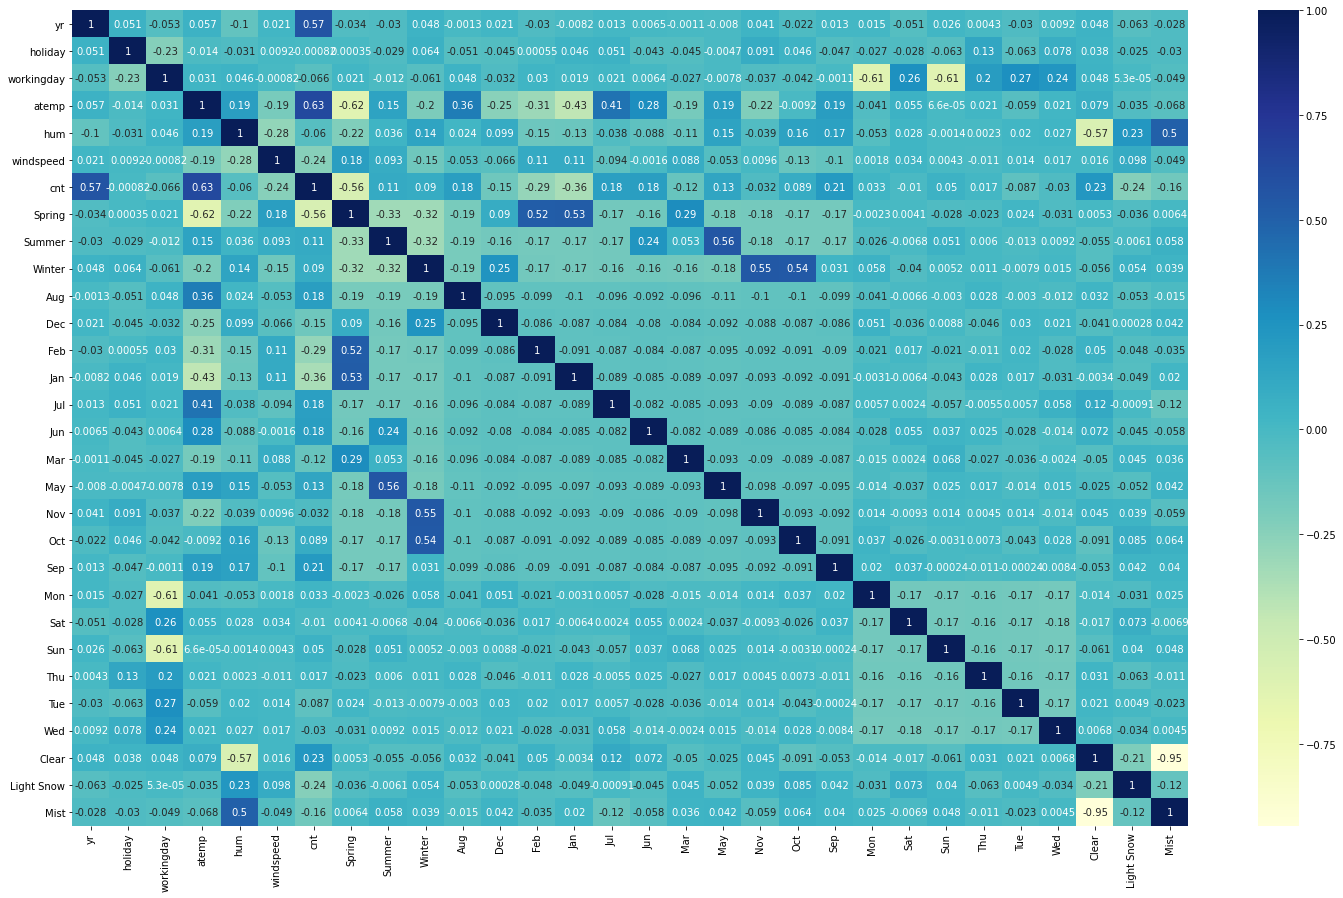

In [384]:
# plotting the correlation coefficients using heatmap to check which variables are highly correlated.

plt.figure(figsize = (25,15))
sns.heatmap(df_corr,cmap = 'YlGnBu',annot=True)
plt.show()

**Insight**: The predictor variable `windspeed` and `atemp` seems to be highly correlated with our target variable **'cnt'**. 

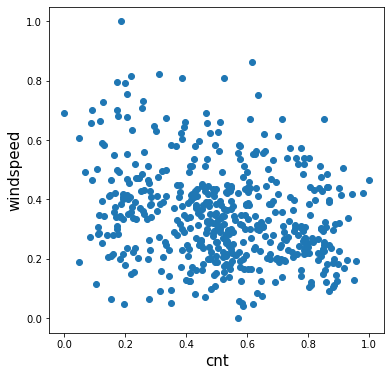

In [385]:
# Let's see a pairplot for cnt vs windspeed

plt.figure(figsize=[6,6])
plt.scatter(df_train.cnt, df_train.windspeed)
plt.xlabel('cnt', fontsize=15)
plt.ylabel('windspeed',fontsize=15)
plt.show()

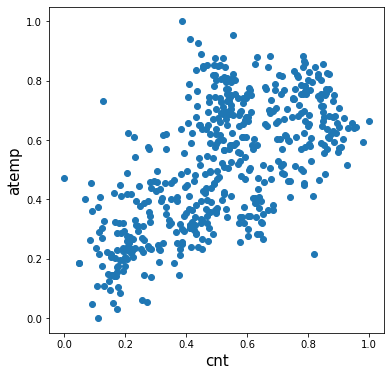

In [386]:
# Let's see a pairplot for cnt vs atemp.

plt.figure(figsize=[6,6])
plt.scatter(df_train.cnt, df_train.atemp)
plt.xlabel('cnt',fontsize=15)
plt.ylabel('atemp',fontsize=15)
plt.show()

### Dividing into X and Y sets for the model building

In [387]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'Spring', 'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue',
       'Wed', 'Clear', 'Light Snow', 'Mist'],
      dtype='object')

In [388]:
y_train = df_train.pop('cnt')
X_train = df_train

In [389]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,Spring,Summer,Winter,Aug,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Clear,Light Snow,Mist
483,1,0,1,0.487055,0.609956,0.194850,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
650,1,0,0,0.409971,0.513852,0.255118,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
212,0,0,1,0.819376,0.572294,0.276919,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
714,1,0,1,0.381804,0.871429,0.161523,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
8,0,0,1,0.048706,0.451083,0.700017,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [390]:
y_train.head()

483    0.722734
650    0.815347
212    0.488265
714    0.433042
8      0.092039
Name: cnt, dtype: float64

## Step 6: <u>Building a linear model<u>

### Adding all the variables to the model

In [391]:
#Build a linear model

import statsmodels.api as sm

# Add a constant
X_train_p_value_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train).fit()

In [392]:
lr.params

yr            0.230967
holiday       0.026995
workingday    0.060989
atemp         0.424686
hum          -0.160295
windspeed    -0.162919
Spring       -0.098961
Summer        0.004305
Winter        0.076720
Aug           0.007326
Dec          -0.054850
Feb          -0.028275
Jan          -0.045846
Jul          -0.020512
Jun           0.019925
Mar           0.025414
May           0.035482
Nov          -0.060256
Oct           0.011919
Sep           0.079529
Mon           0.063464
Sat          -0.003709
Sun           0.068434
Thu          -0.018936
Tue          -0.030168
Wed          -0.038917
Clear         0.323556
Light Snow    0.051380
Mist          0.272759
dtype: float64

In [393]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     92.05
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.43e-173
Time:                        16:09:27   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -963.8
Df Residuals:                     481   BIC:                            -841.0
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yr             0.2310      0.008     27.759      0.0

### RFE
Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [394]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [395]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,13)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [396]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 10),
 ('workingday', False, 6),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 16),
 ('Winter', True, 1),
 ('Aug', False, 15),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', False, 3),
 ('Jun', False, 14),
 ('Mar', False, 11),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 5),
 ('Sat', False, 17),
 ('Sun', False, 4),
 ('Thu', False, 12),
 ('Tue', False, 9),
 ('Wed', False, 8),
 ('Clear', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1)]

In [397]:
# Selecting the variables which are in support

col = X_train.columns[rfe.support_]
col

Index(['yr', 'atemp', 'hum', 'windspeed', 'Spring', 'Winter', 'Dec', 'Jan',
       'Nov', 'Sep', 'Clear', 'Light Snow', 'Mist'],
      dtype='object')

In [398]:
# Selecting the variables which are not in support

X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'Summer', 'Aug', 'Feb', 'Jul', 'Jun', 'Mar',
       'May', 'Oct', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [399]:
# Creating X_test dataframe with RFE selected variables
X_train_ml = X_train[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_ml)

# build the model
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     202.7
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.19e-182
Time:                        16:09:28   Log-Likelihood:                 491.57
No. Observations:                 510   AIC:                            -957.1
Df Residuals:                     497   BIC:                            -902.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2193      0.029      7.662      0.0

In [400]:
X_train_ml.columns

Index(['yr', 'atemp', 'hum', 'windspeed', 'Spring', 'Winter', 'Dec', 'Jan',
       'Nov', 'Sep', 'Clear', 'Light Snow', 'Mist'],
      dtype='object')

## Step 7: Feature Selection and consolidation


### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

We encounter either of these conditions wrt VIF and p-value
1. High p-value [p> 0.05]
2. Low p-value and high VIF
    - High VIF [Remove these where VIF > 5] unless it has business importance
3. Low p-value and low VIF

In [401]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_ml
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Clear,41.89
12,Mist,28.46
11,Light Snow,3.54
1,atemp,2.91
4,Spring,2.75
5,Winter,2.18
2,hum,1.93
8,Nov,1.71
7,Jan,1.51
6,Dec,1.35


<font size=3> **`Clear`** has a very high VIF and hence it should be dropped

### Dropping the variable

In [402]:
# dropping variable 'Clear' as is highly correlated and insignificant variable

X_train_ml.drop('Clear', axis = 1, inplace = True)

### Creating another model using updated feature variables

In [403]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_ml)

# building the model
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     202.7
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.19e-182
Time:                        16:09:28   Log-Likelihood:                 491.57
No. Observations:                 510   AIC:                            -957.1
Df Residuals:                     497   BIC:                            -902.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3950      0.034     11.732      0.0

In [404]:
X_train_ml.columns

Index(['yr', 'atemp', 'hum', 'windspeed', 'Spring', 'Winter', 'Dec', 'Jan',
       'Nov', 'Sep', 'Light Snow', 'Mist'],
      dtype='object')

### Checking VIF

In [405]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_ml
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,22.74
1,atemp,14.10
3,windspeed,4.81
4,Spring,2.83
5,Winter,2.67
11,Mist,2.26
0,yr,2.05
8,Nov,1.83
7,Jan,1.63
6,Dec,1.45


<font size=3> **`hum`** has a very high VIF and hence it should be dropped

### Dropping the variable

In [406]:
# dropping variable 'hum' as is highly correlated and insignificant variable (high VIF)

X_train_ml.drop('hum', axis = 1, inplace = True)

### Creating another model using updated feature variables

In [407]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_ml)

# Building the model
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     212.0
Date:                Mon, 10 May 2021   Prob (F-statistic):          6.53e-180
Time:                        16:09:29   Log-Likelihood:                 482.29
No. Observations:                 510   AIC:                            -940.6
Df Residuals:                     498   BIC:                            -889.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3031      0.026     11.466      0.0

In [408]:
X_train_ml.columns

Index(['yr', 'atemp', 'windspeed', 'Spring', 'Winter', 'Dec', 'Jan', 'Nov',
       'Sep', 'Light Snow', 'Mist'],
      dtype='object')

### Checking VIF

In [409]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_ml
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.74
1,atemp,4.15
4,Winter,2.33
3,Spring,2.26
0,yr,2.04
7,Nov,1.80
6,Jan,1.59
10,Mist,1.51
5,Dec,1.37
8,Sep,1.17


<font size=3> **`windspeed`** has a VIF close to 5 and hence it should be dropped

### Dropping the variable

In [410]:
# dropping variable 'windspeed' as is highly correlated and insignificant variable (high VIF)

X_train_ml.drop('windspeed', axis = 1, inplace = True)

### Creating another model using updated feature variables

In [411]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_ml)

# Building the model
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     220.8
Date:                Mon, 10 May 2021   Prob (F-statistic):          4.57e-176
Time:                        16:09:29   Log-Likelihood:                 470.38
No. Observations:                 510   AIC:                            -918.8
Df Residuals:                     499   BIC:                            -872.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2387      0.023     10.191      0.0

In [412]:
X_train_ml.columns

Index(['yr', 'atemp', 'Spring', 'Winter', 'Dec', 'Jan', 'Nov', 'Sep',
       'Light Snow', 'Mist'],
      dtype='object')

### Checking VIF

In [413]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_ml
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Winter,2.33
1,atemp,2.31
0,yr,2.02
2,Spring,1.87
6,Nov,1.75
5,Jan,1.57
9,Mist,1.50
4,Dec,1.37
7,Sep,1.17
8,Light Snow,1.04


### Insights:
- This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

### <font color= blue> **The VIFs and p-values both are within an acceptable range of <5. So we can go ahead and make our predictions using this as as a final model.**

## Step 8: Analysis of the train data

**Assumptions for Linear Regression**

1. Linearity
2. Mean of Residuals
3. Check for Homoscedasticity
4. Check for Normality of error terms/residuals
5. No autocorrelation of residuals
6. No perfect multicollinearity

In [414]:
lm.predict(X_train_rfe)

483    0.672461
650    0.717074
212    0.575816
714    0.570336
8      0.096504
         ...   
467    0.662572
444    0.635271
46     0.249292
374    0.439286
366    0.403365
Length: 510, dtype: float64

In [415]:
# Predicting the cnt of training set.
y_train_pred = lm.predict(X_train_rfe)

In [416]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

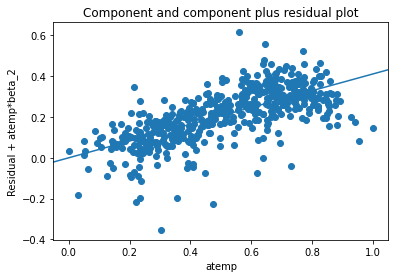

In [417]:
# Validating Linear Relationship
sm.graphics.plot_ccpr(lm, 'atemp')
plt.show()

The partial residual plot represents the relationship between the predictor and the dependent variable while taking into account all the other variables. As we can see in the above graph, the linearity is well respected.

In [418]:
#Checking for Mean of Residuals
residuals = y_train - y_train_pred
mean_residual = np.mean(residuals)
print('Mean of Residual: {}'.format(mean_residual))

Mean of Residual: -3.3665880540839304e-16


#### Insight: The residuals seem small and unstructured

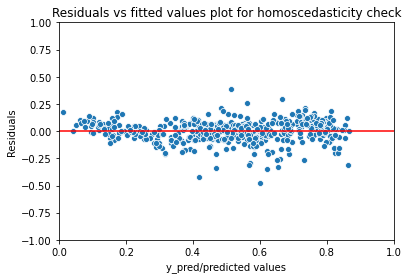

In [419]:
#Check for Homoscedasticity
p = sns.scatterplot(y_train_pred, residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-1,1)
plt.xlim(0,1)
p = sns.lineplot([0,1],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

#### Insight: 
The error term is showing same variance across all values of the independent variables.

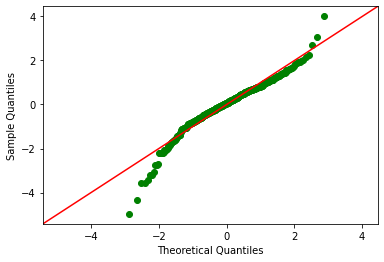

In [420]:
# checking if error terms are having normal distribution
sm.qqplot((y_train - y_train_pred), fit=True, line='45', color='green')
plt.show()

#### Insight: 
The error terms are normally distributed

### Residual Analysis of the train data

- So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of it.

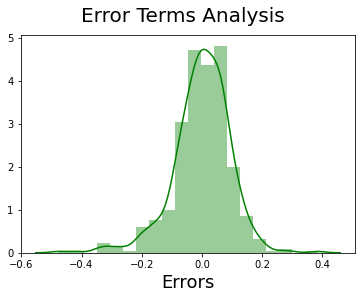

In [421]:
# So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of it.
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20, color= 'green')
fig.suptitle('Error Terms Analysis', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                                  # X-label
plt.show()

#### Insight: The error terms seem to be normally distributed and centered around zero.

### Multicollinearity between the predictor variables

In [422]:
# Check for the VIF values of the feature variables of selected model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_ml
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Winter,2.33
1,atemp,2.31
0,yr,2.02
2,Spring,1.87
6,Nov,1.75
5,Jan,1.57
9,Mist,1.50
4,Dec,1.37
7,Sep,1.17
8,Light Snow,1.04


### Insight:

 - From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

## Step 9: <u>Making Prediction<u>
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

### Applying the scaling on the test sets

### Rescaling Features

- Applying the scaling on the test sets

In [423]:
# Applying scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

df_test[numeric_columns] = scaler.transform(df_test[numeric_columns])

In [424]:
df_test.shape

(219, 30)

In [425]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Clear,Light Snow,Mist
22,0,0,1,0.025950,0.453529,0.462217,0.110907,1,0,0,...,0,0,0,0,0,0,1,1,0,0
468,1,0,0,0.536771,0.522511,0.347424,0.855729,0,1,0,...,0,1,0,0,0,0,0,1,0,0
553,1,0,1,0.933712,0.596104,0.212829,0.534975,0,0,0,...,0,0,0,0,0,1,0,1,0,0
504,1,0,1,0.662746,0.551083,0.478229,0.817648,0,1,0,...,0,0,0,0,0,1,0,1,0,0
353,0,0,1,0.416610,0.618615,0.080770,0.428900,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [426]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,Spring,Summer,Winter,Aug,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Clear,Light Snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.692157,0.515631,0.647390,0.346318,0.24902,0.247059,0.241176,0.098039,...,0.082353,0.143137,0.147059,0.143137,0.131373,0.143137,0.152941,0.633333,0.025490,0.341176
std,0.500487,0.151726,0.462054,0.213626,0.149722,0.160266,0.43287,0.431725,0.428217,0.297660,...,0.275172,0.350557,0.354512,0.350557,0.338139,0.350557,0.360284,0.482368,0.157763,0.474570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.335807,0.536147,0.230784,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.525578,0.646367,0.325635,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.692378,0.757900,0.434287,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [427]:
df_test.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'Spring', 'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue',
       'Wed', 'Clear', 'Light Snow', 'Mist'],
      dtype='object')

In [428]:
y_test = df_test.pop('cnt')
X_test = df_test

In [429]:
X_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,Spring,Summer,Winter,Aug,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Clear,Light Snow,Mist
22,0,0,1,0.025950,0.453529,0.462217,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
468,1,0,0,0.536771,0.522511,0.347424,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
553,1,0,1,0.933712,0.596104,0.212829,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
504,1,0,1,0.662746,0.551083,0.478229,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
353,0,0,1,0.416610,0.618615,0.080770,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [430]:
y_test.head()

22     0.110907
468    0.855729
553    0.534975
504    0.817648
353    0.428900
Name: cnt, dtype: float64

## Step 10: <u>Making Predictions Using the Final Model<u>
Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model.

In [431]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_ml.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [432]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Step 11: <u>Model Evaluation<u>

Let's now plot the graph for actual versus predicted values.

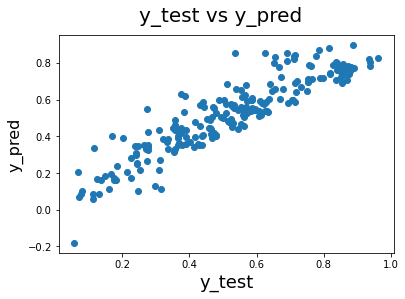

In [433]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

### **RMSE Score** ###

In [434]:
from sklearn.metrics import mean_squared_error

#Returns the mean squared error; we'll take a square root[RMSE]
print('RMSE score of the model : ',np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE score of the model :  0.09174575488664456


### **R2 Score** ###

In [435]:
from sklearn.metrics import r2_score

print('Train R2 : ', r2_score(y_train,y_train_pred))
print('Test R2 : ', r2_score(y_test,y_pred))

Train R2 :  0.815633870190121
Test R2 :  0.8252168929692074


### Adjusted R^2 Value for TEST

In [436]:
# We already have the value of R^2 (calculated in above step)
R2_test= 0.8252168929692074
# Get the shape of X_test
X_test.shape

(219, 29)

In [437]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-R2_test)*(n-1)/(n-p-1)
print('adjusted_R2_Test : ', round(adjusted_r2,4))

adjusted_R2_Test :  0.7984


## <font color= blue><u> Final Model Interpretation

### Hypothesis Testing:

Hypothesis testing states that:
- H0 : B1=B2=......=Bn=0 
- H1 : at least one  Bi != 0

### F Statistics

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- F-statistic: 220.8
- Prob (F-statistic): 4.57e-176 

The F-Statistics value of 220.8 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant.

#### MLR Line Equation

In [438]:
line_equation = lm.params
l_st = [str(round(line_equation[i],4)) + ' * ' + i for i in line_equation.index]
l_str = ' + '.join(l_st)
print(l_str.replace(' * const',''))

0.2387 + 0.2334 * yr + 0.4114 * atemp + -0.1175 * Spring + 0.0763 * Winter + -0.0639 * Dec + -0.0448 * Jan + -0.0736 * Nov + 0.0679 * Sep + -0.3243 * Light Snow + -0.0713 * Mist


## <font color= blue><u>Model coefficient values<u>

In [439]:
line_equation.sort_values(ascending=False)

atemp         0.411375
const         0.238745
yr            0.233353
Winter        0.076324
Sep           0.067908
Jan          -0.044777
Dec          -0.063868
Mist         -0.071283
Nov          -0.073578
Spring       -0.117500
Light Snow   -0.324294
dtype: float64

### Insights
- From the model summary, it is evident that all our coefficients are not equal to zero, which means **We REJECT the NULL HYPOTHESIS**
    

## <font color= blue><u>Equation of Line to predict the cnt value<u> :


<br><font size = 4 color='blue'>$ cnt = 0.2387 + 0.2334 \times yr + 0.4114 \times atemp - 0.1175 \times Spring + 0.0763 \times Winter - 0.0639 \times Dec - 0.0448 \times Jan - 0.0736 \times Nov + 0.0679 \times Sep - 0.3243 \times Light Snow - 0.0713 \times Mist $ 



## <font color= blue><u>Final Result Comparison<u>

- Train R^2 : 0.816
- Train Adjusted R^2 : 0.812 
- Test R^2 : 0.825
- Test Adjusted R^2 : 0.7984
- This seems to be a really good model that can very well 'Generalize' various datasets.

### <font color= blue><u>Model Conclusions<u>:
- R-squared and Adjusted R-squared : 0.816 and 0.812 --> 81.6% variance explained.
- F-stats and Prob(F-stats) (overall model fit) : 220.8 and 4.57e-176(approx. 0.0) --> Model fit is significant and explained 81.6% <br> variance is just not by chance.
- p-values : p-values for all the coefficients seem to be less than the significance level of 0.05. --> meaning that all the <br>predictors are statistically significant.

## <font color= blue><u>Interpretation of Coefficients<u>:

**yr:** A coefficient value of ‘0.2334’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.2308 units.

**atemp:** A coefficient value of ‘0.4114’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.4114 units.

**Spring:** A coefficient value of ‘−0.1175’ indicated that w.r.t season, a unit increase in Spring variable, decreases the bike hire numbers by 0.1175 units.

**Winter:** A coefficient value of ‘0.0763’ indicated that w.r.t season, a unit increase in Winter variable increases the bike hire numbers by 0.0763 units.

**Dec:** A coefficient value of ‘−0.0639’ indicated that w.r.t mnth, a unit increase in Dec variable decreases the bike hire numbers by  0.0639 units.

**Jan:** A coefficient value of ‘−0.0448’ indicated that w.r.t mnth, a unit increase in Jan variable increases the bike hire numbers by  0.0448 units.

**Nov:** A coefficient value of ‘−0.0736’ indicated that w.r.t mnth, a unit increase in Nov variable decreases the bike hire numbers by 0.0736 units.

**Sep:** A coefficient value of ‘0.0679’ indicated that w.r.t mnth, a unit increase in Sep variable increases the bike hire numbers by 0.0679 units.

**Light Snow:** A coefficient value of ‘−0.3243’ indicated that w.r.t weathersit, a unit increase in Light Snow variable decreases the bike hire numbers by 0.3243 units.

**Mist:** A coefficient value of ‘−0.0713’ indicated that w.r.t Weathersit, a unit increase in Mist variable, decreases the bike hire numbers by 0.0713 units.

**const:** The Constant value of ‘0.2387’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.2387 units.

## <font color=blue><u>FINAL REPORT<u>

As per our final Model, the top 3 predictor variables that influences the bike booking (`cnt`) are: 
- **Year (yr)** - A coefficient value of ‘0.2334’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.2308 units.
- **Temperature (atemp)** - A coefficient value of ‘0.4114’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.4114 units. 
- **weathersit (Light Snow)** - A coefficient value of ‘−0.3243’ indicated that w.r.t weathersit, a unit increase in Light Snow variable decreases the bike hire numbers by 0.3243 units.
 

#### So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking.

The next best features that can also be considered are 
- **Season (Spring)** - A coefficient value of ‘−0.1175’ indicated that w.r.t season, a unit increase in Spring variable, decreases the bike hire numbers by 0.1175 units. 
- **Season (Winter)** - A coefficient value of ‘0.0763’ indicated that w.r.t season, a unit increase in Winter variable increases the bike hire numbers by 0.0763 units.

## <font color=blue><u>Closing Statement<u>:
- The model is good enough to predict the counts which explains the variance of data upto 81.6% which is quite a good digit to conclude upon that the model is significant.

# <font color=brown><center>-----------------------------END-----------------------------<center>

## Assignment-based Subjective Questions 

Q : **From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?**

A : We did the analysis based on the following variables 
1. Season : People prefer to take bikes mostly when it Fall/Summer/Winter and not in spring.
2. Year : There was a growth in the number of people opting for the bikes in 2019 as compared to 2018
3. Month : Distribution of months is contrary to the season distribution. While we see winter having higher percentiles same is not replicated in the months of Dec-Feb
4. Holiday : Median of population opting for bikes on non-holidays is more than that of holidays
5. WeekDay : Medians for all the days are more or less the same
6. WorkingDay : This variable counters our data based on holiday.  
7. Weather Situation : Incase of Heavy rains or light snow we see a decrease in the number of people taking bikes. People are more likely to take bikes when there is a clear sky or light mist

Q : **Why is it important to use drop_first=True during dummy variable creation?**

A : `drop_first=True` will create k-1 dummy variables for k categories, it is important to use as it helps in reducing the    extra column created during dummy variable creation, if we don't specify drop_first option, it will create k dummy variables.  Thus when used, it reduces the correlations created among dummy variables.

Q : **Looking at the pair-plot among the numerical variables, which one has the highest correlation with the target variable?**

A : The predictor variable 'atemp' seems to be highly correlated with our target variable 'cnt'.

Q : **How did you validate the assumptions of Linear Regression after building the model on the training set?**

A : 
There are four assumptions associated with a linear regression model:

1. Linearity: based on Pairplot we saw the linearity of the `numerical variables` with `cnt`
2. Mean of Residual: -3.3665e-16 which is very close to 0
3. Homoscedasticity: The variance of residuals is not dependent on the variable X_train_ml due to which we can reject heteroscedasticity
4. Normality: The residual terms are normally distributed, but not perfectly a normal curve due to lower sample size.
5. No Perfect Multicollinearity based on the heatmap for the X_train input training variables vs cnt

Q : **Based on the final model, which are the top 3 features contributing significantly towards explaining the demand of the shared bikes?**
<br>A:     
1. `atemp`
2. `yr`
3. `Light Snow`